In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-forecasting/train.csv


The dataset used above is for forecasting sales of a supermarket based on various parameters.

In [2]:
import pandas as pd                     #importing libraries
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt         #for plotting bar chart/pie chart

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
sale = pd.read_csv('/kaggle/input/sales-forecasting/train.csv')

In [4]:
sale.head()           #the dataset

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


****Cleaning the data and dropping unneccessary columns****

In [5]:
sale_clean = sale.drop(['Row ID','Customer ID','Country','Product ID','Ship Date'],axis=1)



sale_clean.head()

,Order ID,Order Date,Ship Mode,Customer Name,Segment,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,Second Class,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,Second Class,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


Heatmap to check whether we have any missing data

<Axes: >

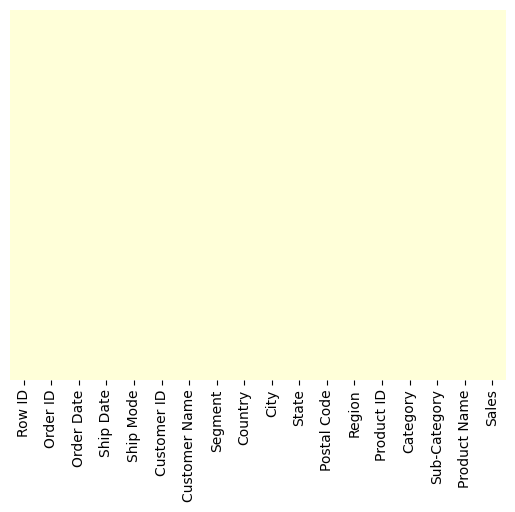

In [6]:
sns.heatmap(sale.isnull(), yticklabels = False, cbar = False, cmap="YlGnBu")


There is no missing data!

In [7]:
sale["Order Date"] = pd.DatetimeIndex(sale["Order Date"])
sale["Ship Date"] = pd.DatetimeIndex(sale["Ship Date"])

/tmp/ipykernel_20/1158325620.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sale["Order Date"] = pd.DatetimeIndex(sale["Order Date"])
/tmp/ipykernel_20/1158325620.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sale["Ship Date"] = pd.DatetimeIndex(sale["Ship Date"])


In [8]:
sale['Year'] = pd.DatetimeIndex(sale['Order Date']).year
sale['Month'] = pd.DatetimeIndex(sale['Order Date']).month
sale['Day'] = pd.DatetimeIndex(sale['Order Date']).day
sale['Day of Week'] = sale['Order Date'].dt.strftime('%A')

sale.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month,Day,Day of Week
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,8,11,Friday
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,8,11,Friday
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,12,6,Wednesday
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,11,10,Thursday
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,11,10,Thursday


**Data Visualisation**

**EDA - Exploratory Data Analysis**

array([[<Axes: title={'center': 'Order Date'}>,
        <Axes: title={'center': 'Ship Date'}>],
       [<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>]], dtype=object)

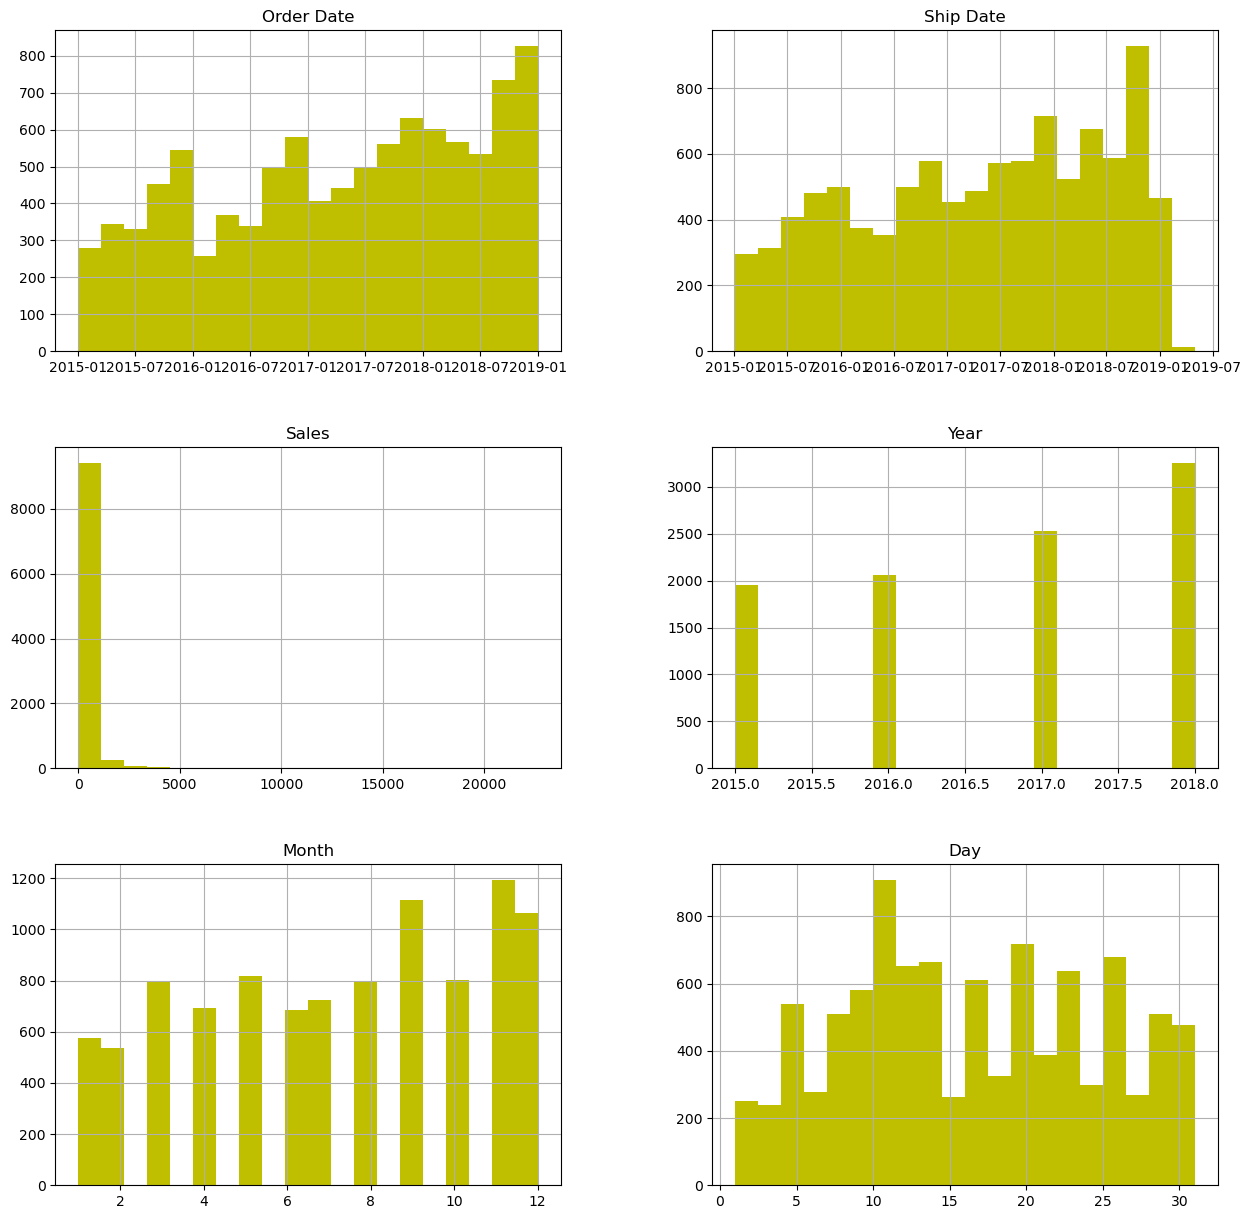

In [9]:
sale[['Order Date' , 'Ship Date' , 'Sales' , 'Year', 'Month', 'Day']].hist(bins=20 ,figsize = (15,15), color = 'y')

Analysing sales trend on various factors like cities, day, month, year

Top cities acc to sales

In [10]:
best_cities = sale.pivot_table(values = "Sales" , index = "City" , aggfunc = "sum")
best_cities = best_cities.sort_values(by=['Sales'], ascending=False).head(20)
best_cities.reset_index(inplace=True)
best_cities['Sales']=best_cities['Sales'].round(2)
best_cities

,City,Sales
0,New York City,252462.55
1,Los Angeles,173420.18
2,Seattle,116106.32
3,San Francisco,109041.12
4,Philadelphia,108841.75
5,Houston,63956.14
6,Chicago,47820.13
7,San Diego,47521.03
8,Jacksonville,44713.18
9,Detroit,42446.94


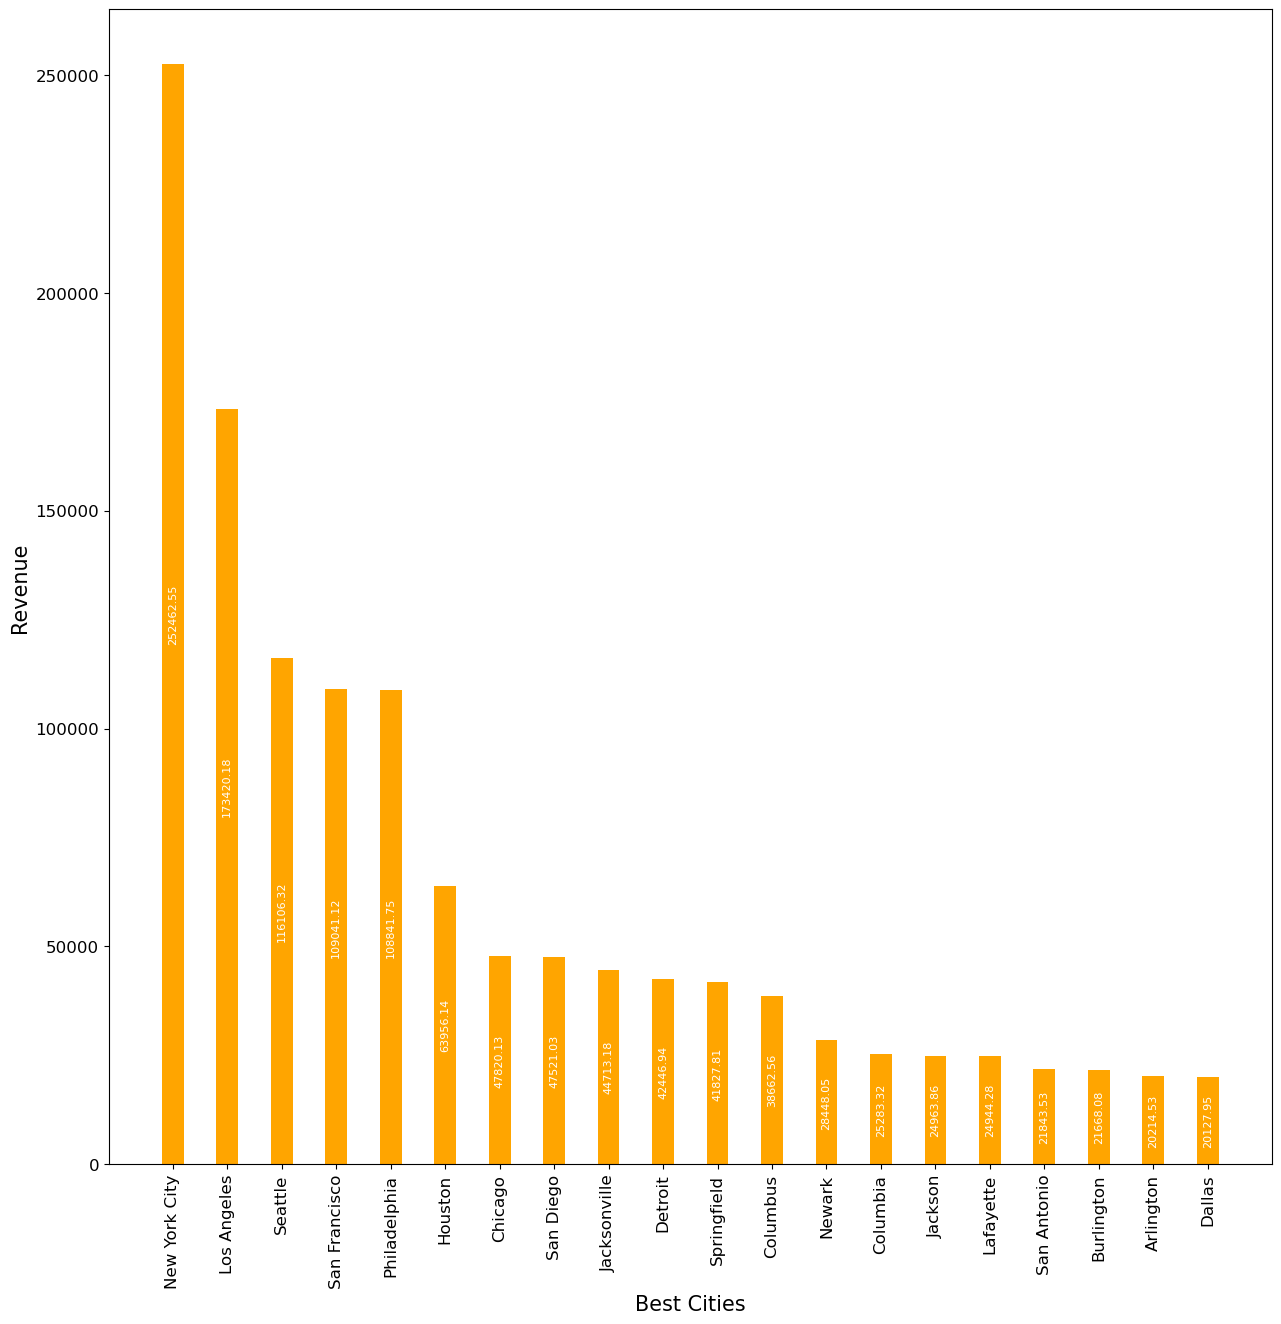

In [11]:
fig = plt.figure(figsize = (15, 15))
 
# creating the bar plot
plt.bar(best_cities['City'],best_cities['Sales'] , color ='orange',width = 0.4)
 
plt.xlabel("Best Cities",fontsize=15)
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

for i , v in enumerate(best_cities['Sales']):
    plt.text(i, v/2 , str(v) , ha='center' , va='center' , rotation=90 , color='white' , fontsize=8)
plt.show()

Top categories acc to sales

In [12]:
best_category = sale.pivot_table(values = "Sales" , index = "Category" , aggfunc = "sum")
best_category = best_category.sort_values(by=['Sales'], ascending=False).head()
best_category.reset_index(inplace=True)
best_category['Sales']=best_category['Sales'].round(2)
best_category

,Category,Sales
0,Technology,827455.87
1,Furniture,728658.58
2,Office Supplies,705422.33


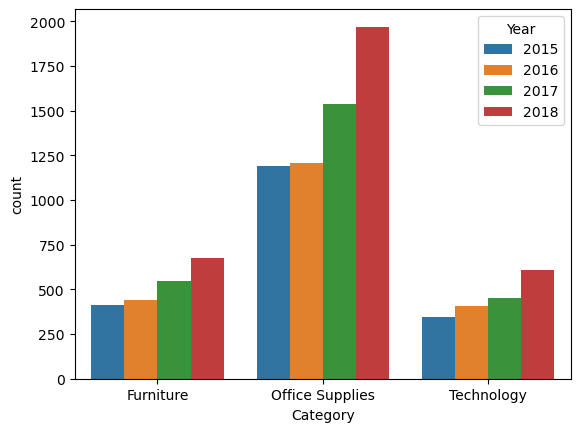

In [13]:
sns.countplot(data=sale,x="Category", hue='Year')
plt.xticks(rotation=0)
plt.show()

****

Sales analysis - per year, per month & per day

<Figure size 640x480 with 0 Axes>

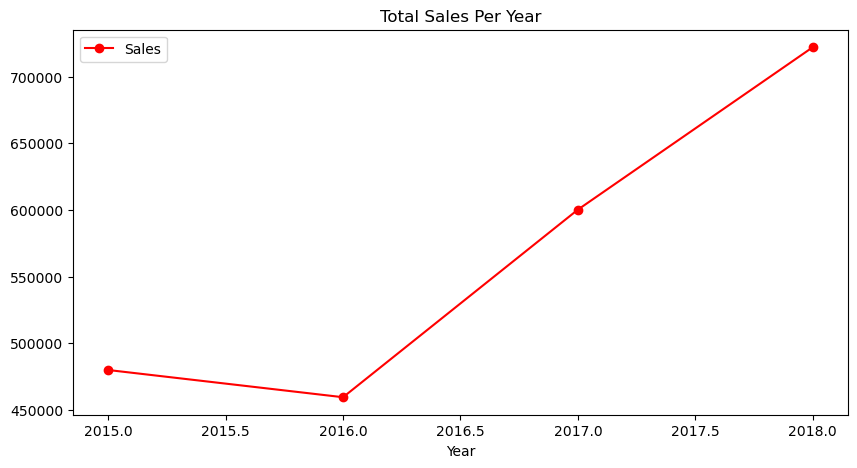

<Figure size 640x480 with 0 Axes>

In [14]:
axis = sale.groupby('Year')[['Sales']].sum().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Total Sales Per Year')

plt.figure()


<Figure size 640x480 with 0 Axes>

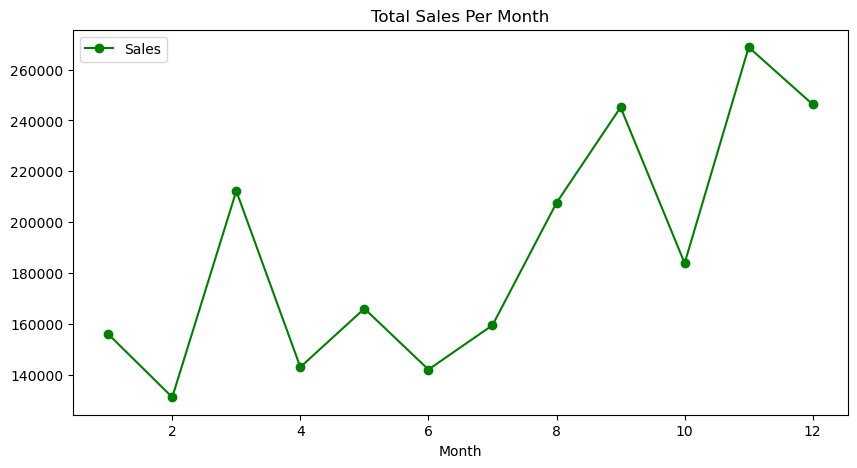

<Figure size 640x480 with 0 Axes>

In [15]:
axis = sale.groupby('Month')[['Sales']].sum().plot(figsize = (10,5), marker = 'o', color = 'g')
axis.set_title('Total Sales Per Month')

plt.figure()

<Figure size 640x480 with 0 Axes>

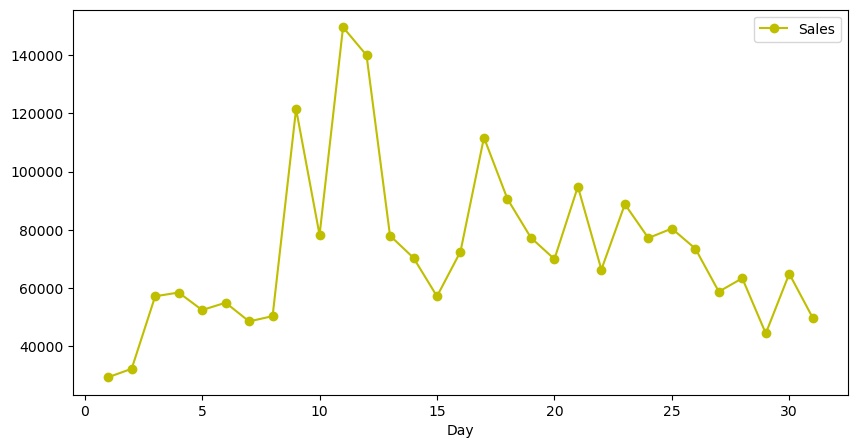

<Figure size 640x480 with 0 Axes>

In [16]:
ax = sale.groupby('Day')[['Sales']].sum().plot(figsize = (10,5), marker = 'o', color = 'y')
axis.set_title('Total Sales Per Day')

plt.figure()

**SALES FORECAST**

Sales forecast is being made using ARIMA model for time series forecasting.

The ARIMA model predicts a given time series based on its own past values. It can be used for any nonseasonal series of numbers that exhibits patterns and is not a series of random events. For example, sales data from a clothing store would be a time series because it was collected over a period of time.



In [17]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(sale.Year.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -56.195459
p-value: 0.000000


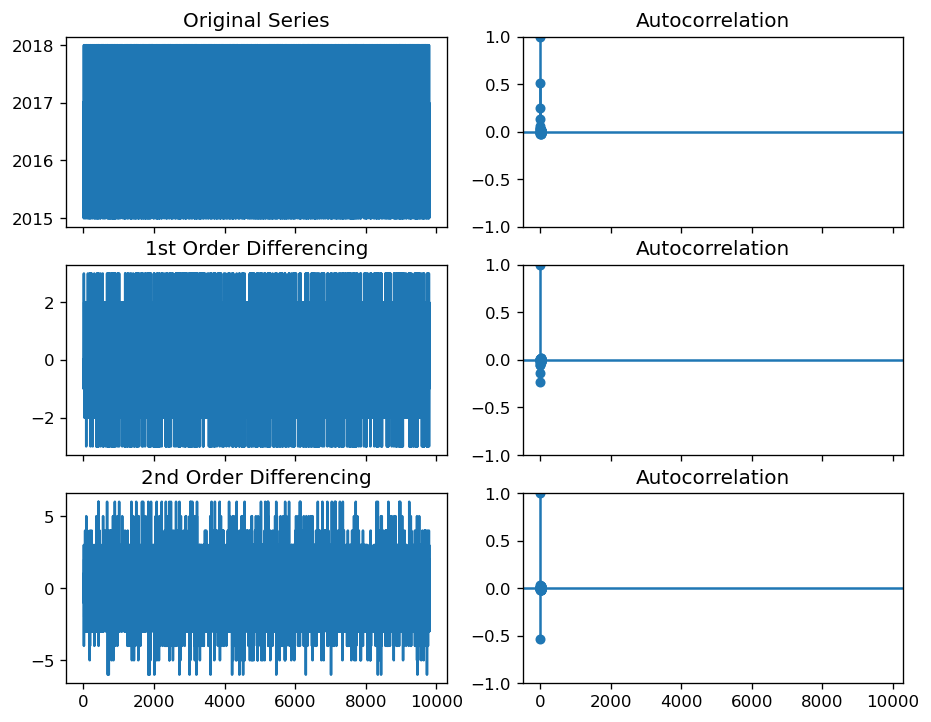

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(sale.Year); axes[0, 0].set_title('Original Series')
plot_acf(sale.Year, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(sale.Year.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(sale.Year.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(sale.Year.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(sale.Year.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

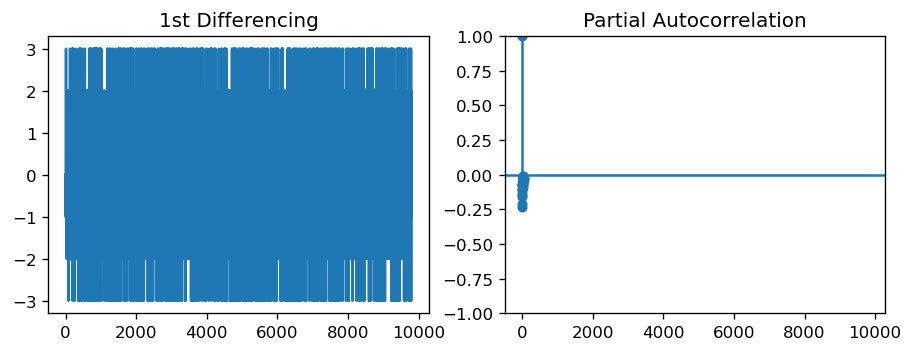

In [19]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(sale.Year.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(sale.Year.diff().dropna(), ax=axes[1])

plt.show()

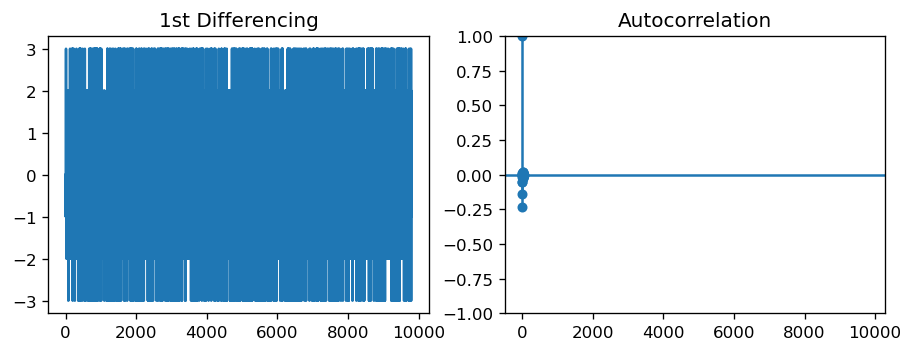

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(sale.Year.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(sale.Year.diff().dropna(), ax=axes[1])

plt.show()

In [21]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(sale.Year, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Year   No. Observations:                 9800
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -14925.850
Date:                Mon, 24 Jul 2023   AIC                          29853.699
Time:                        10:42:11   BIC                          29860.889
Sample:                             0   HQIC                         29856.135
                               - 9800                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.2319      0.013     95.965      0.000       1.207       1.257
Ljung-Box (L1) (Q):                 533.83   Jarque-Bera (JB):              1264.34
Prob(Q):                              0.00   Pr

In [22]:
# Make predictions
start_idx = len(sale)
end_idx = len(sale) + len(sale) - 1
predictions = model_fit.predict(start=0, end=22)

# Print the predictions
print(predictions)

0        0.0
1     2017.0
2     2017.0
3     2017.0
4     2016.0
5     2016.0
6     2015.0
7     2015.0
8     2015.0
9     2015.0
10    2015.0
11    2015.0
12    2015.0
13    2018.0
14    2017.0
15    2016.0
16    2016.0
17    2015.0
18    2015.0
19    2015.0
20    2015.0
21    2015.0
22    2017.0
Name: predicted_mean, dtype: float64


**Trend in dataset**

We can see the change in trend in our dataset, Trend helps us see where the value of data that we are considering is going upward or downward in the long run.

<Axes: >

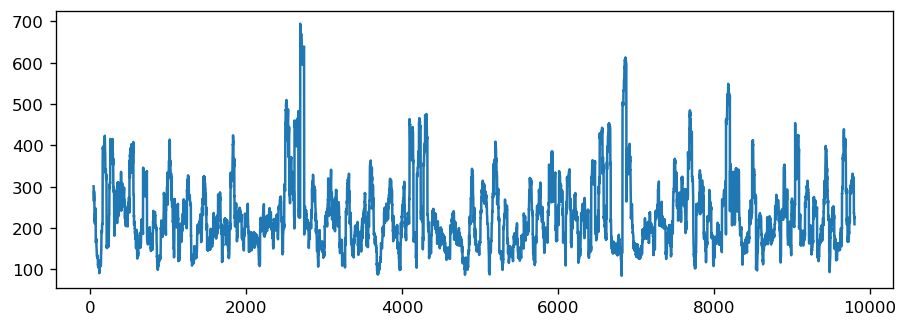

In [23]:
window_size = 50
rolling_mean = sale['Sales'].rolling\
            (window_size).mean()
rolling_mean.plot()